In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB , ComplementNB


In [ ]:
df1 = pd.read_csv('/content/Youtube01.csv').drop(['AUTHOR','DATE','COMMENT_ID'],axis=1)
df2 = pd.read_csv('/content/Youtube02.csv').drop(['AUTHOR','DATE','COMMENT_ID'],axis=1)
df3 = pd.read_csv('/content/Youtube03.csv').drop(['AUTHOR','DATE','COMMENT_ID'],axis=1)
df4 = pd.read_csv('/content/Youtube04.csv').drop(['AUTHOR','DATE','COMMENT_ID'],axis=1)
df5 = pd.read_csv('/content/Youtube05.csv').drop(['AUTHOR','DATE','COMMENT_ID'],axis=1)

In [ ]:
df5.shape

(370, 2)

In [ ]:
df_new = pd.concat([df1,df2,df3,df4,df5],axis=0)

In [ ]:
df_new.isnull().sum()

CONTENT    0
CLASS      0
dtype: int64

In [ ]:
X = df_new['CONTENT']
Y = df_new['CLASS']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,random_state=300)

In [ ]:
x_train.shape

(1564,)

In [ ]:
x_test.shape

(391,)

In [ ]:
y_train.value_counts()

1    805
0    759
Name: CLASS, dtype: int64

In [ ]:
cuv = CountVectorizer()

In [ ]:
x_train_trf = cuv.fit_transform(x_train)
x_test_trf = cuv.transform(x_test)

In [ ]:
x_train_trf.toarray()
x_test_trf.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(x_train_trf,y_train)

MultinomialNB()

In [ ]:
y_pred = clf.predict(x_test_trf)


In [ ]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,

In [ ]:
clf.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn'}

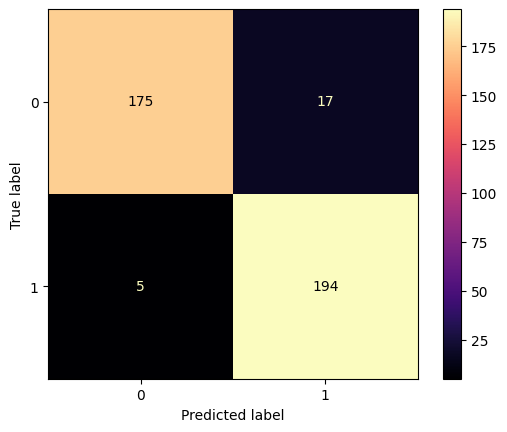

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    labels = clf.classes_ ,
    cmap = 'magma'
)

**###########  Model Evaluation metrics (Accuracy,Precision,F1 score,Recall) ############**

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Ham','Spam']))

              precision    recall  f1-score   support

         Ham       0.97      0.91      0.94       192
        Spam       0.92      0.97      0.95       199

    accuracy                           0.94       391
   macro avg       0.95      0.94      0.94       391
weighted avg       0.95      0.94      0.94       391

